In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [2]:
childbirth_df = pd.read_csv('datasets/childbirth.csv', sep=';')

In [3]:
childbirth_df

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK
0,1,7047428.00,230440,1,24,1.00,4.00,999992.00,4.00,0.00,...,2.00,3,11012020.00,5.00,0,1,1,5,1,2
1,1,2497654.00,230440,1,21,1.00,3.00,513205.00,3.00,0.00,...,2.00,3,13012020.00,2.00,0,1,1,5,1,3
2,1,2481286.00,230440,1,31,2.00,3.00,999992.00,2.00,0.00,...,5.00,0,14012020.00,3.00,0,1,1,5,1,5
3,1,2497654.00,230440,1,28,2.00,3.00,763015.00,2.00,0.00,...,2.00,3,13012020.00,11.00,0,1,1,4,1,5
4,1,2481286.00,230440,1,18,5.00,3.00,999992.00,2.00,0.00,...,5.00,0,14012020.00,3.00,0,1,1,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40939,1,2651351.00,230440,1,43,2.00,4.00,763010.00,2.00,1.00,...,5.00,0,30122020.00,4.00,0,1,1,4,1,5
40940,1,2497654.00,230440,1,38,1.00,3.00,631010.00,3.00,0.00,...,2.00,3,17012022.00,11.00,0,1,1,4,1,2
40941,1,2651351.00,230440,1,25,5.00,3.00,354705.00,2.00,NaN,...,5.00,0,18012022.00,3.00,0,1,1,3,1,5
40942,1,2497654.00,230440,1,18,2.00,3.00,999992.00,1.00,0.00,...,2.00,3,31012022.00,11.00,0,1,1,5,1,2


In [4]:
childbirth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40944 entries, 0 to 40943
Data columns (total 60 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ORIGEM      40944 non-null  int64  
 1   CODESTAB    40798 non-null  float64
 2   CODMUNNASC  40944 non-null  int64  
 3   LOCNASC     40944 non-null  int64  
 4   IDADEMAE    40944 non-null  int64  
 5   ESTCIVMAE   40198 non-null  float64
 6   ESCMAE      40630 non-null  float64
 7   CODOCUPMAE  38210 non-null  float64
 8   QTDFILVIVO  31964 non-null  float64
 9   QTDFILMORT  26881 non-null  float64
 10  CODMUNRES   40944 non-null  int64  
 11  GESTACAO    39601 non-null  float64
 12  GRAVIDEZ    40837 non-null  float64
 13  PARTO       40887 non-null  float64
 14  CONSULTAS   40944 non-null  int64  
 15  DTNASC      40944 non-null  int64  
 16  HORANASC    40928 non-null  float64
 17  SEXO        40944 non-null  int64  
 18  APGAR1      40752 non-null  float64
 19  APGAR5      40759 non-nul

In [5]:
childbirth_df.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK'],
      dtype='object')

<AxesSubplot:>

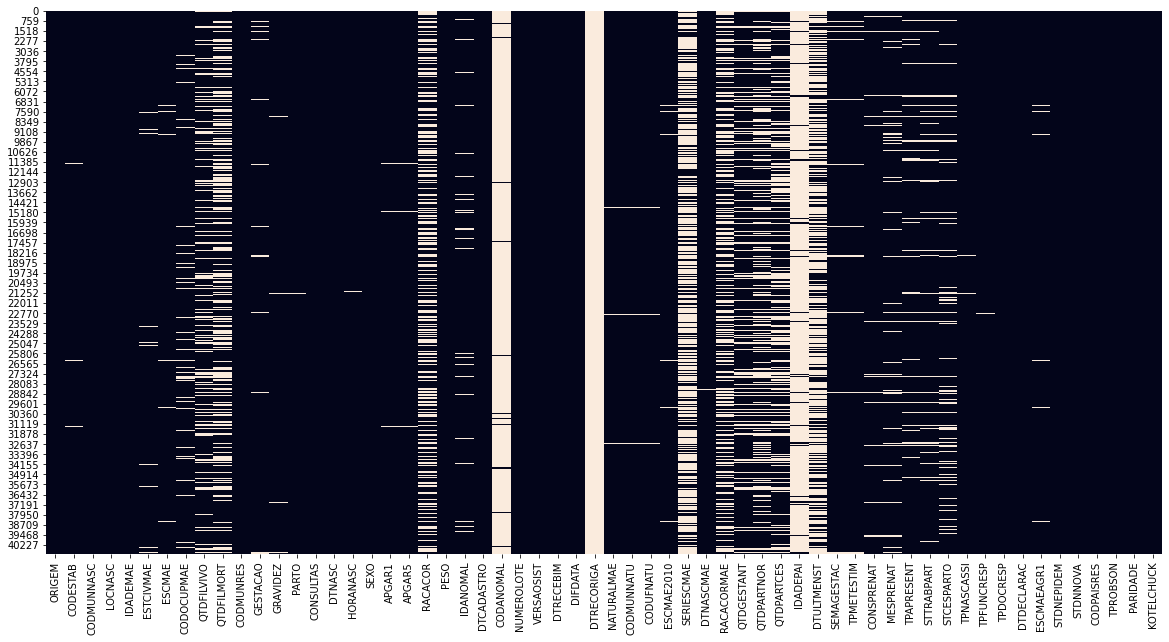

In [6]:
fig, ax = plt.subplots(figsize=(20,10))        
# sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)

sns.heatmap(childbirth_df.isnull(), cbar = False, ax=ax)

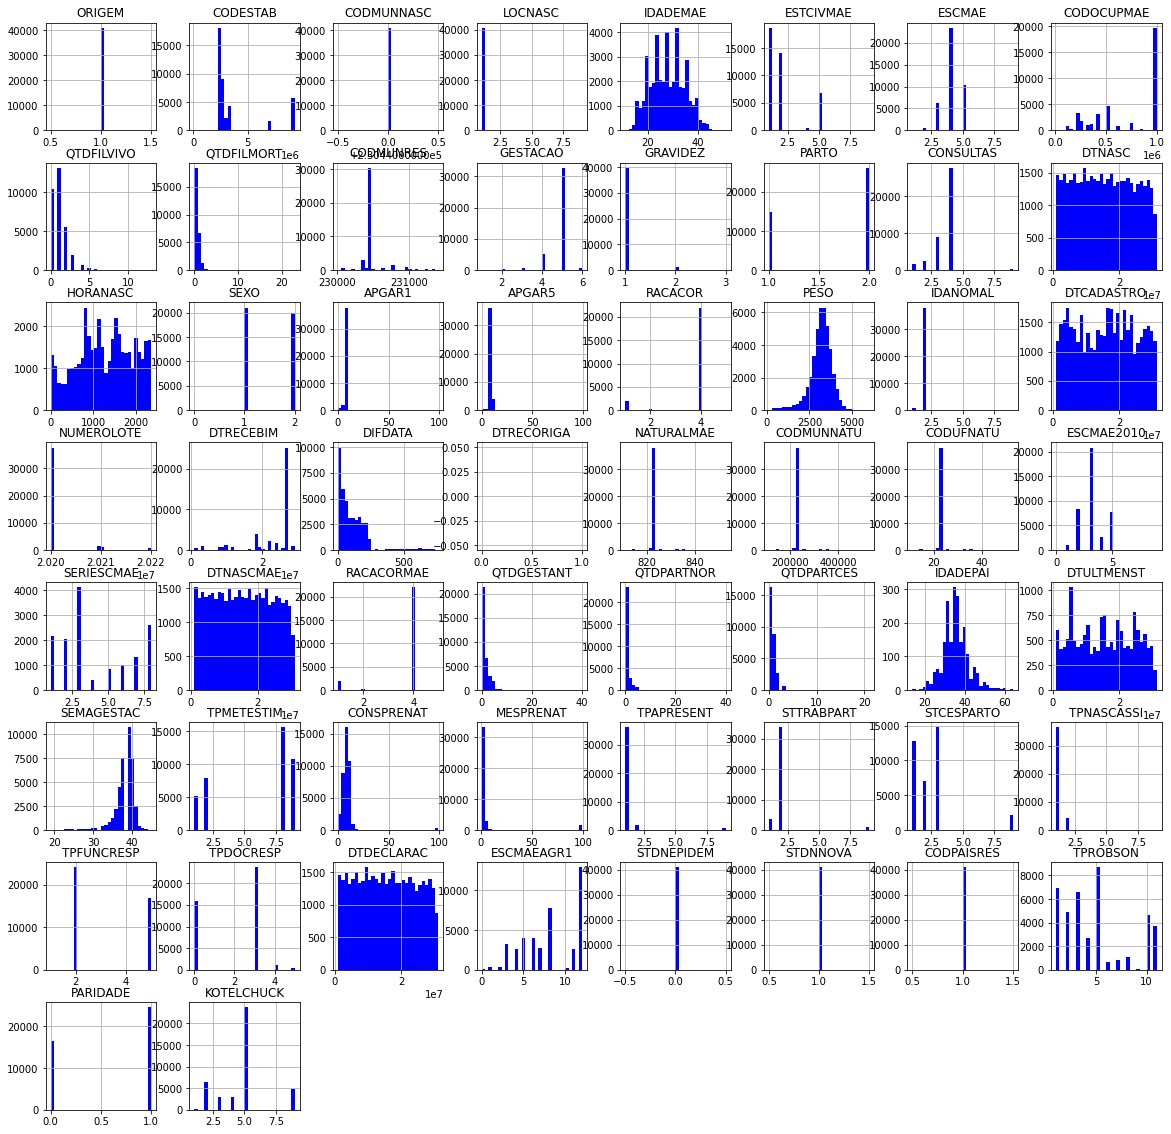

In [7]:
childbirth_df.hist(bins = 30, figsize=(20,20), color = 'b');

In [8]:
df = childbirth_df[['CODESTAB', 'ESTCIVMAE', 'CODOCUPMAE', 'CODMUNRES', 'GESTACAO', 
                    'GRAVIDEZ', 'IDADEMAE', 'CONSULTAS', 'PESO',
                    'PARTO']]
df

,CODESTAB,ESTCIVMAE,CODOCUPMAE,CODMUNRES,GESTACAO,GRAVIDEZ,IDADEMAE,CONSULTAS,PESO,PARTO
0,7047428.00,1.00,999992.00,231240,5.00,1.00,24,3,3355.00,2.00
1,2497654.00,1.00,513205.00,231000,5.00,1.00,21,2,3264.00,2.00
2,2481286.00,2.00,999992.00,230370,5.00,1.00,31,4,3360.00,2.00
3,2497654.00,2.00,763015.00,230350,5.00,1.00,28,4,3365.00,2.00
4,2481286.00,5.00,999992.00,230440,5.00,1.00,18,2,2465.00,1.00
...,...,...,...,...,...,...,...,...,...,...
40939,2651351.00,2.00,763010.00,230440,5.00,1.00,43,4,3580.00,2.00
40940,2497654.00,1.00,631010.00,230440,5.00,1.00,38,2,4250.00,2.00
40941,2651351.00,5.00,354705.00,230370,5.00,1.00,25,4,3745.00,1.00
40942,2497654.00,2.00,999992.00,230440,5.00,1.00,18,2,3378.00,2.00


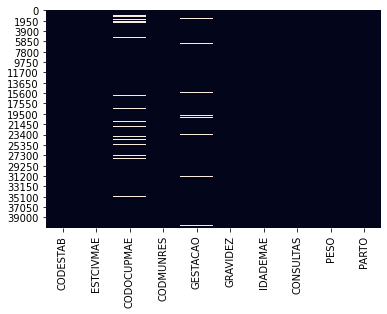

In [9]:
sns.heatmap(df.isnull(), cbar = False);

In [10]:
df = df.dropna().reset_index(drop=True)
df

,CODESTAB,ESTCIVMAE,CODOCUPMAE,CODMUNRES,GESTACAO,GRAVIDEZ,IDADEMAE,CONSULTAS,PESO,PARTO
0,7047428.00,1.00,999992.00,231240,5.00,1.00,24,3,3355.00,2.00
1,2497654.00,1.00,513205.00,231000,5.00,1.00,21,2,3264.00,2.00
2,2481286.00,2.00,999992.00,230370,5.00,1.00,31,4,3360.00,2.00
3,2497654.00,2.00,763015.00,230350,5.00,1.00,28,4,3365.00,2.00
4,2481286.00,5.00,999992.00,230440,5.00,1.00,18,2,2465.00,1.00
...,...,...,...,...,...,...,...,...,...,...
36122,2497654.00,1.00,999992.00,230440,5.00,1.00,15,4,3560.00,1.00
36123,2651351.00,2.00,763010.00,230440,5.00,1.00,43,4,3580.00,2.00
36124,2497654.00,1.00,631010.00,230440,5.00,1.00,38,2,4250.00,2.00
36125,2651351.00,5.00,354705.00,230370,5.00,1.00,25,4,3745.00,1.00


In [11]:
X_cat = df[['CODESTAB', 'ESTCIVMAE', 'CODOCUPMAE', 'CODMUNRES', 'GESTACAO', 'GRAVIDEZ']]
X_cat

,CODESTAB,ESTCIVMAE,CODOCUPMAE,CODMUNRES,GESTACAO,GRAVIDEZ
0,7047428.00,1.00,999992.00,231240,5.00,1.00
1,2497654.00,1.00,513205.00,231000,5.00,1.00
2,2481286.00,2.00,999992.00,230370,5.00,1.00
3,2497654.00,2.00,763015.00,230350,5.00,1.00
4,2481286.00,5.00,999992.00,230440,5.00,1.00
...,...,...,...,...,...,...
36122,2497654.00,1.00,999992.00,230440,5.00,1.00
36123,2651351.00,2.00,763010.00,230440,5.00,1.00
36124,2497654.00,1.00,631010.00,230440,5.00,1.00
36125,2651351.00,5.00,354705.00,230370,5.00,1.00


In [13]:
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [14]:
X_cat = pd.DataFrame(X_cat)
X_cat.shape

(36127, 813)

In [15]:
X_num = pd.DataFrame(df[['IDADEMAE', 'CONSULTAS', 'PESO']])
X_num

,IDADEMAE,CONSULTAS,PESO
0,24,3,3355.00
1,21,2,3264.00
2,31,4,3360.00
3,28,4,3365.00
4,18,2,2465.00
...,...,...,...
36122,15,4,3560.00
36123,43,4,3580.00
36124,38,2,4250.00
36125,25,4,3745.00


In [16]:
X_all = pd.concat([X_cat, X_num], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,...,806,807,808,809,810,811,812,IDADEMAE,CONSULTAS,PESO
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,24,3,3355.00
1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,21,2,3264.00
2,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,31,4,3360.00
3,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,28,4,3365.00
4,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,18,2,2465.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36122,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,15,4,3560.00
36123,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,43,4,3580.00
36124,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,38,2,4250.00
36125,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,25,4,3745.00


In [17]:
y_orig = df['PARTO']
y_orig

0       2.00
1       2.00
2       2.00
3       2.00
4       1.00
        ... 
36122   1.00
36123   2.00
36124   2.00
36125   1.00
36126   2.00
Name: PARTO, Length: 36127, dtype: float64

In [18]:
y_orig.unique()

array([2., 1.])

0: normal 
1: cesárea

In [19]:
y = y_orig.apply(lambda row: 1 if row == 2. else 0) 
y

0        1
1        1
2        1
3        1
4        0
        ..
36122    0
36123    1
36124    1
36125    0
36126    1
Name: PARTO, Length: 36127, dtype: int64

In [20]:
y.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

1    64.51%
0    35.49%
Name: PARTO, dtype: object

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size = 0.2)

In [36]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
y_pred = forest.predict(X_test)

In [27]:
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [30]:
accuracy_score(y_test, y_pred)

0.6580404096318848

In [31]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1011, 1520],
       [ 951, 3744]], dtype=int64)

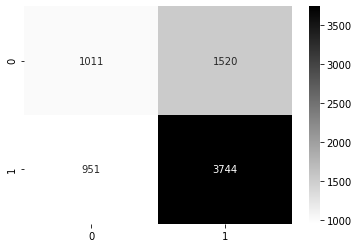

In [32]:
sns.heatmap(cm, annot=True, fmt='g', cmap='binary');

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.40      0.45      2531
           1       0.71      0.80      0.75      4695

    accuracy                           0.66      7226
   macro avg       0.61      0.60      0.60      7226
weighted avg       0.64      0.66      0.65      7226



In [138]:
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████| 29/29 [1:26:51<00:00, 179.69s/it]


In [139]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.62,0.64,0.64,0.63,2.42
BernoulliNB,0.64,0.62,0.62,0.65,4.59
XGBClassifier,0.68,0.61,0.61,0.66,36.48
LGBMClassifier,0.68,0.61,0.61,0.66,3.87
AdaBoostClassifier,0.68,0.60,0.60,0.65,35.81
RandomForestClassifier,0.66,0.60,0.60,0.65,30.86
NuSVC,0.63,0.60,0.60,0.63,3629.66
KNeighborsClassifier,0.65,0.60,0.60,0.64,7.11
ExtraTreesClassifier,0.65,0.60,0.60,0.64,65.06


In [34]:
childbirth_subset_df = childbirth_df.drop(['ORIGEM','CODMUNNASC', 'DTRECORIGA', 'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES',
                                           ], axis = 1)

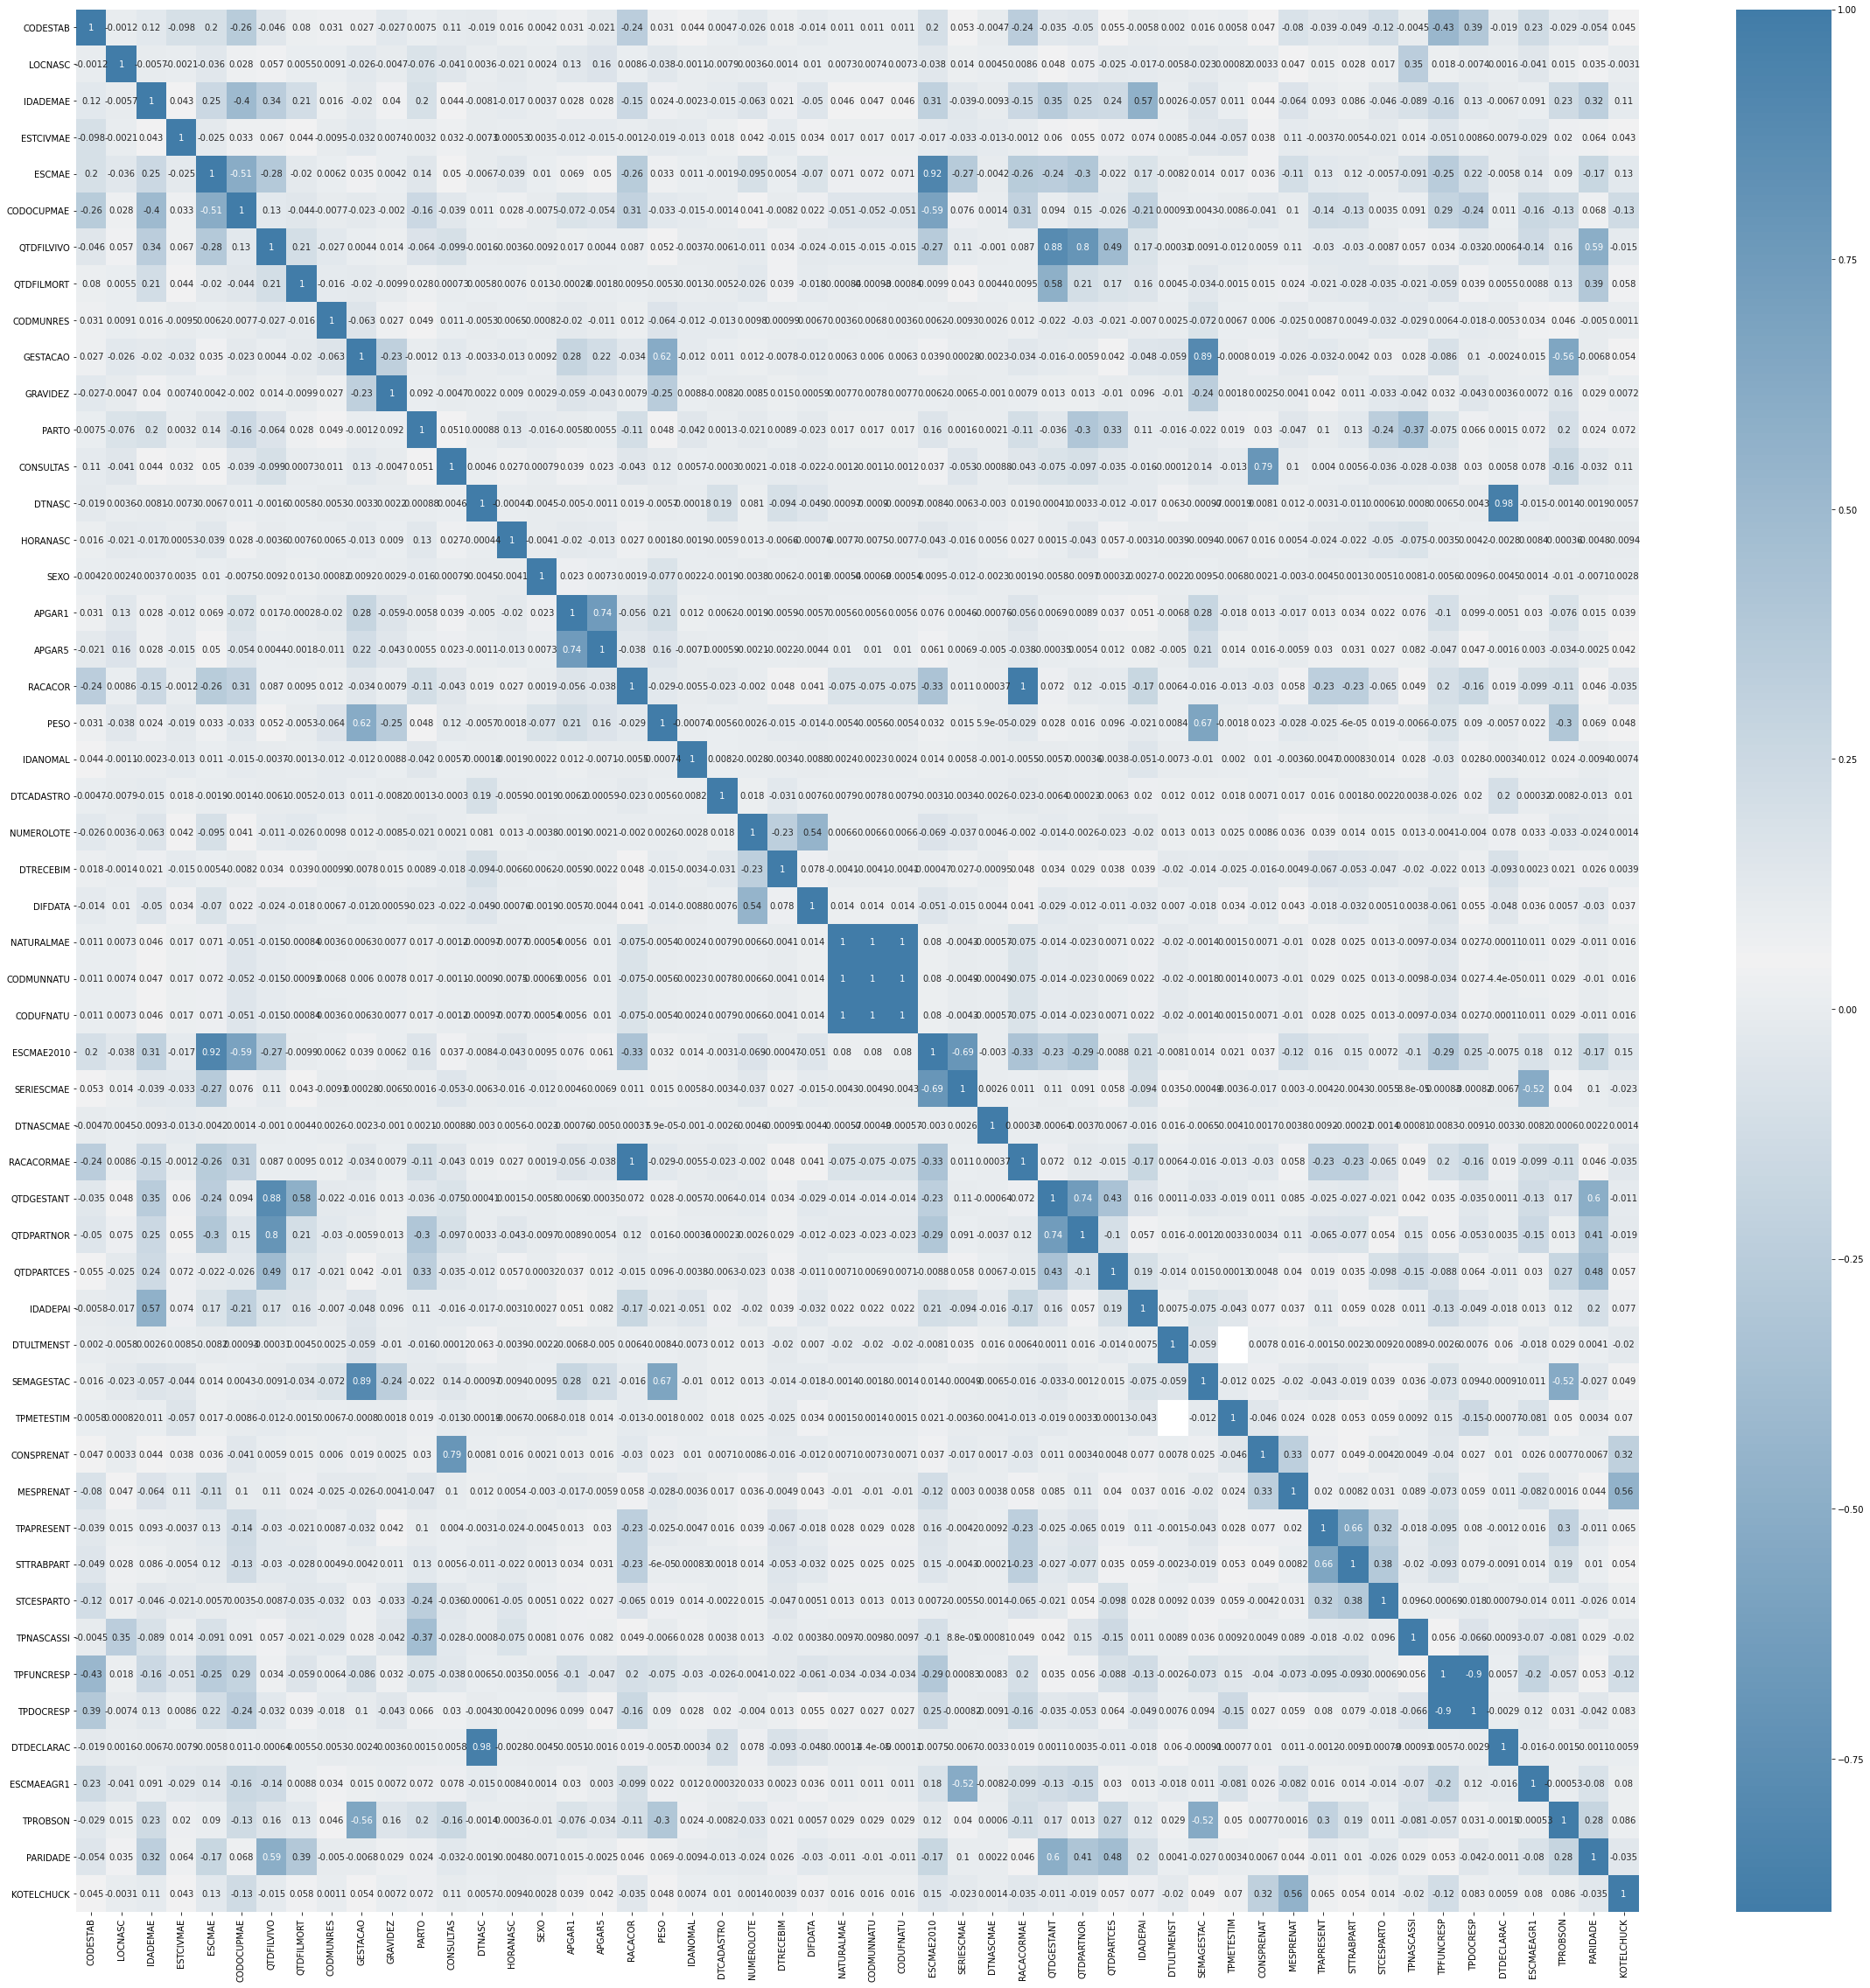

In [35]:
correlations = childbirth_subset_df.corr()
_, ax = plt.subplots(figsize = (40,40))
sns.heatmap(correlations, annot=True, cmap=sns.diverging_palette(240,240, as_cmap=True)); 